<a href="https://colab.research.google.com/github/PurvajaSawalakhe/Feedback-System/blob/main/DL_practical_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

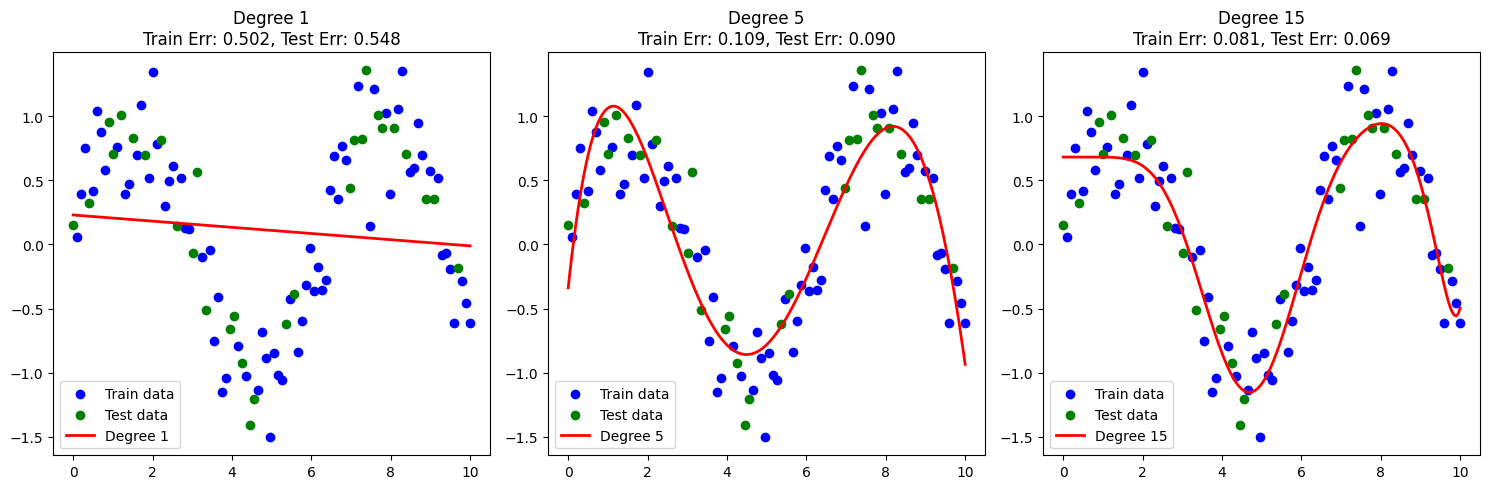

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = np.linspace(0, 10, 100)
y = np.sin(X) + np.random.normal(scale=0.3, size=100)  # noisy sine wave
X = X.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


def plot_polynomial_fit(degrees):
    plt.figure(figsize=(15, 5))

    for i, degree in enumerate(degrees, 1):
        # Create polynomial features
        poly = PolynomialFeatures(degree=degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.transform(X_test)

        # Fit linear regression
        model = LinearRegression()
        model.fit(X_train_poly, y_train)

        # Predictions
        y_train_pred = model.predict(X_train_poly)
        y_test_pred = model.predict(X_test_poly)

        # Errors
        train_error = mean_squared_error(y_train, y_train_pred)
        test_error = mean_squared_error(y_test, y_test_pred)

        # Plot results
        plt.subplot(1, 3, i)
        plt.scatter(X_train, y_train, color="blue", label="Train data")
        plt.scatter(X_test, y_test, color="green", label="Test data")

        # Smooth curve for visualization
        X_curve = np.linspace(0, 10, 200).reshape(-1, 1)
        X_curve_poly = poly.transform(X_curve)
        y_curve = model.predict(X_curve_poly)
        plt.plot(X_curve, y_curve, color="red", linewidth=2, label=f"Degree {degree}")

        plt.title(f"Degree {degree}\nTrain Err: {train_error:.3f}, Test Err: {test_error:.3f}")
        plt.legend()

    plt.tight_layout()
    plt.show()

plot_polynomial_fit([1, 5, 15])
